## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 

The company wants to know:
Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Reading and Understanding dataset

In [3977]:
### Importing necessary Libraries

## For analysis and numeric function
import numpy as np
import pandas as pd

## for visualization and EDA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## for splitting and scaling
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

## Extra
import warnings
warnings.filterwarnings('ignore')

In [3978]:
## Reading Dataset
bike=pd.read_csv("day.csv")

In [3979]:
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3980]:
## Determining number of rows and columns
bike.shape

(730, 16)

In [3981]:
## Determing datatypes of each column
bike.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [3982]:
## Missing value check
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### There are no missing values in the dataset


In [3983]:
## Checking Statistical summary of the numerical variables of the dataset
bike.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

## Insights:
(i) There are 730 rows and 16 columns present in the dataset.

(ii) All the columns have the datatypes as int /float except dteday column which is an object datatype.

(iii)There are no missing values in the dataset.

(iv) There are some columns present that are categorical in nature but have the datatype as float/int type.

## Dropping Irrelevant columns

In [3984]:
## from the dataset, instant column can be drop as it is an index column.
bike.drop(['instant'],axis=1,inplace=True)

In [3985]:
bike.head()

dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0  01-01-2018       1   0     1        0        1           1           2   
1  02-01-2018       1   0     1        0        2           1           2   
2  03-01-2018       1   0     1        0        3           1           1   
3  04-01-2018       1   0     1        0        4           1           1   
4  05-01-2018       1   0     1        0        5           1           1   

        temp     atemp      hum  windspeed  casual  registered   cnt  
0  14.110847  18.18125  80.5833  10.749882     331         654   985  
1  14.902598  17.68695  69.6087  16.652113     131         670   801  
2   8.050924   9.47025  43.7273  16.636703     120        1229  1349  
3   8.200000  10.60610  59.0435  10.739832     108        1454  1562  
4   9.305237  11.46350  43.6957  12.522300      82        1518  1600

In [3986]:
## we can drop dteday column as we have the same information in yr and mnth column
bike.drop(['dteday'],axis=1,inplace=True)
bike.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        1           1           2  14.110847   
1       1   0     1        0        2           1           2  14.902598   
2       1   0     1        0        3           1           1   8.050924   
3       1   0     1        0        4           1           1   8.200000   
4       1   0     1        0        5           1           1   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  
0  18.18125  80.5833  10.749882     331         654   985  
1  17.68695  69.6087  16.652113     131         670   801  
2   9.47025  43.7273  16.636703     120        1229  1349  
3  10.60610  59.0435  10.739832     108        1454  1562  
4  11.46350  43.6957  12.522300      82        1518  1600

In [3987]:
## cnt is our target variable and cnt=casual+registered. So we can drop casual and registered column as it is not required
bike.drop(['casual','registered'],axis=1,inplace=True)
bike.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        1           1           2  14.110847   
1       1   0     1        0        2           1           2  14.902598   
2       1   0     1        0        3           1           1   8.050924   
3       1   0     1        0        4           1           1   8.200000   
4       1   0     1        0        5           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [3988]:
bike.shape

(730, 12)

### After dropping irrelevant columns, the number of columns in the dataset got reduced to 12. 

In [3989]:
## checking info:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


# EDA / Visualising the data set

In [3990]:
bike.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [3991]:
bike.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        1           1           2  14.110847   
1       1   0     1        0        2           1           2  14.902598   
2       1   0     1        0        3           1           1   8.050924   
3       1   0     1        0        4           1           1   8.200000   
4       1   0     1        0        5           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [3992]:
##Segmenting columns
categ_cols=["season","yr","mnth","holiday","weekday","workingday","weathersit"]
cont_cols=["temp","atemp","hum","windspeed","cnt"]
target=["cnt"]

## Mapping/Replacing categorical column variables with appropriate values

In [3993]:
## Mapping appropriate values for categorical variables season,mnth,weathersit and weekday

bike['season']=bike['season'].map({1:"spring",2:"summer",3:"fall",4:"winter"})
bike['weathersit']=bike['weathersit'].map({1:"clear to Partly Cloudy",2:"Misty and Cloudy",3:"Light Rain or Snow",4:"Heavy Rain or Ice palletes"})
bike['weekday']=bike['weekday'].map({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"})
bike['mnth']=bike['mnth'].map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})
bike.head()

season  yr mnth  holiday weekday  workingday              weathersit  \
0  spring   0  Jan        0     Mon           1        Misty and Cloudy   
1  spring   0  Jan        0     Tue           1        Misty and Cloudy   
2  spring   0  Jan        0     Wed           1  clear to Partly Cloudy   
3  spring   0  Jan        0     Thu           1  clear to Partly Cloudy   
4  spring   0  Jan        0     Fri           1  clear to Partly Cloudy   

        temp     atemp      hum  windspeed   cnt  
0  14.110847  18.18125  80.5833  10.749882   985  
1  14.902598  17.68695  69.6087  16.652113   801  
2   8.050924   9.47025  43.7273  16.636703  1349  
3   8.200000  10.60610  59.0435  10.739832  1562  
4   9.305237  11.46350  43.6957  12.522300  1600

In [3994]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [3995]:
#changing data types of numerical columns to appropriate types

bike[["temp","atemp","hum","windspeed","cnt"]]= bike[["temp","atemp","hum","windspeed","cnt"]].apply(pd.to_numeric)

In [3996]:
bike.head()

season  yr mnth  holiday weekday  workingday              weathersit  \
0  spring   0  Jan        0     Mon           1        Misty and Cloudy   
1  spring   0  Jan        0     Tue           1        Misty and Cloudy   
2  spring   0  Jan        0     Wed           1  clear to Partly Cloudy   
3  spring   0  Jan        0     Thu           1  clear to Partly Cloudy   
4  spring   0  Jan        0     Fri           1  clear to Partly Cloudy   

        temp     atemp      hum  windspeed   cnt  
0  14.110847  18.18125  80.5833  10.749882   985  
1  14.902598  17.68695  69.6087  16.652113   801  
2   8.050924   9.47025  43.7273  16.636703  1349  
3   8.200000  10.60610  59.0435  10.739832  1562  
4   9.305237  11.46350  43.6957  12.522300  1600

In [3997]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Univariate analysis

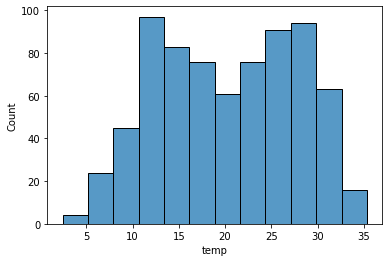

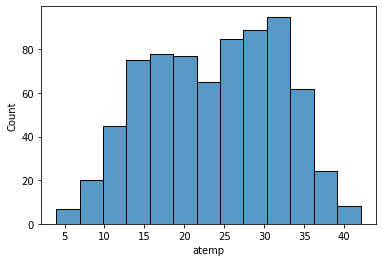

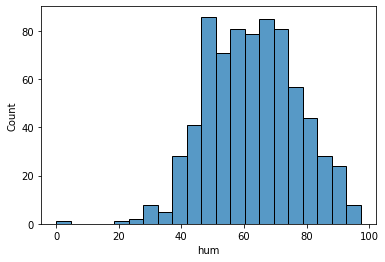

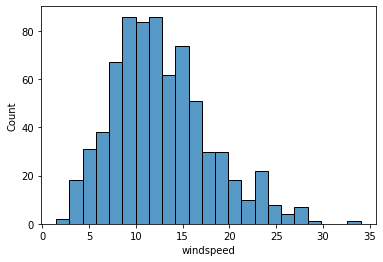

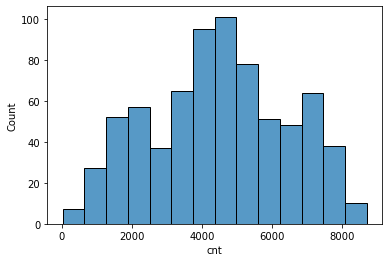

In [3998]:
for i in cont_cols:
    sns.histplot(bike[i])
    plt.show()

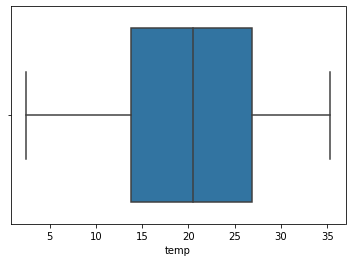

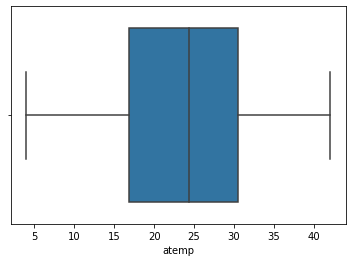

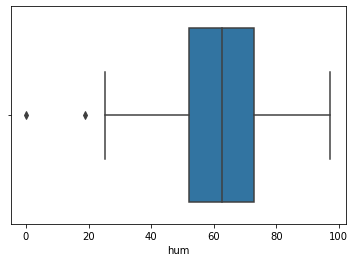

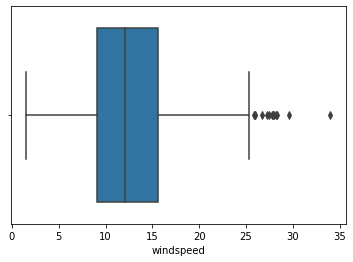

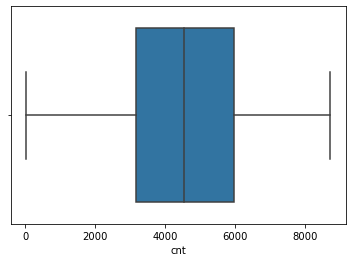

In [3999]:
for i in cont_cols:
    sns.boxplot(bike[i])
    plt.show()

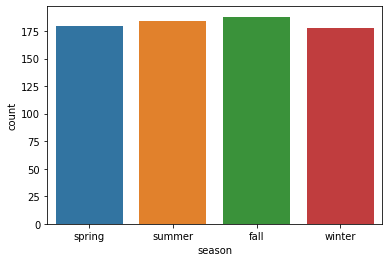

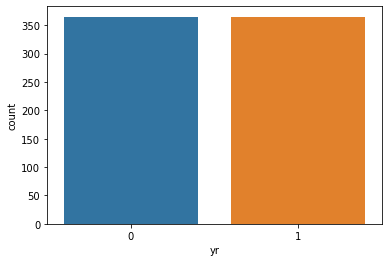

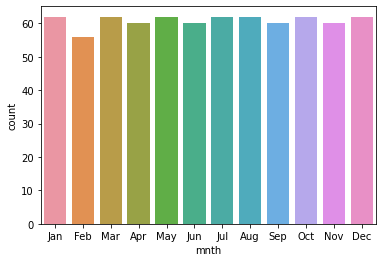

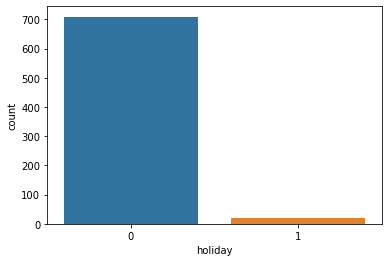

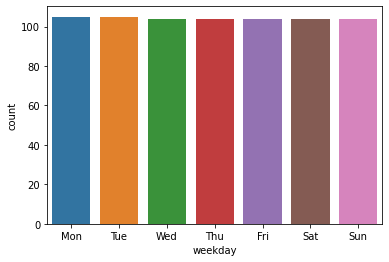

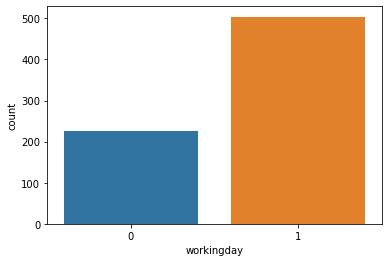

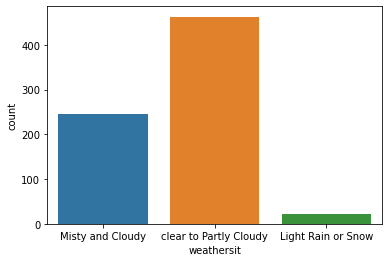

In [4000]:
for i in categ_cols:
    sns.countplot(bike[i])
    plt.show()

## Bivariate Analysis

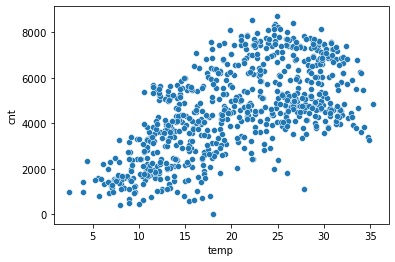

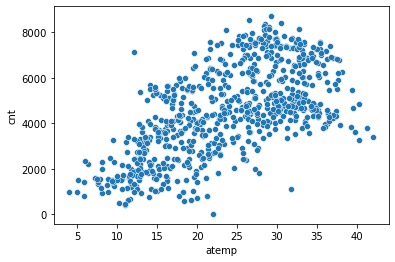

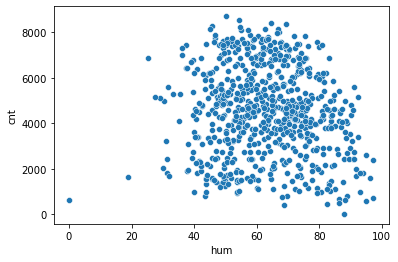

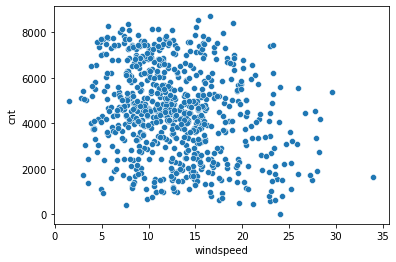

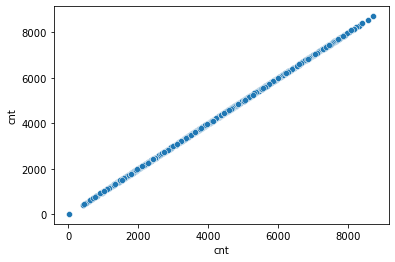

In [4001]:
for i in cont_cols:
    sns.scatterplot(x=bike[i],y=bike["cnt"])
    plt.show()

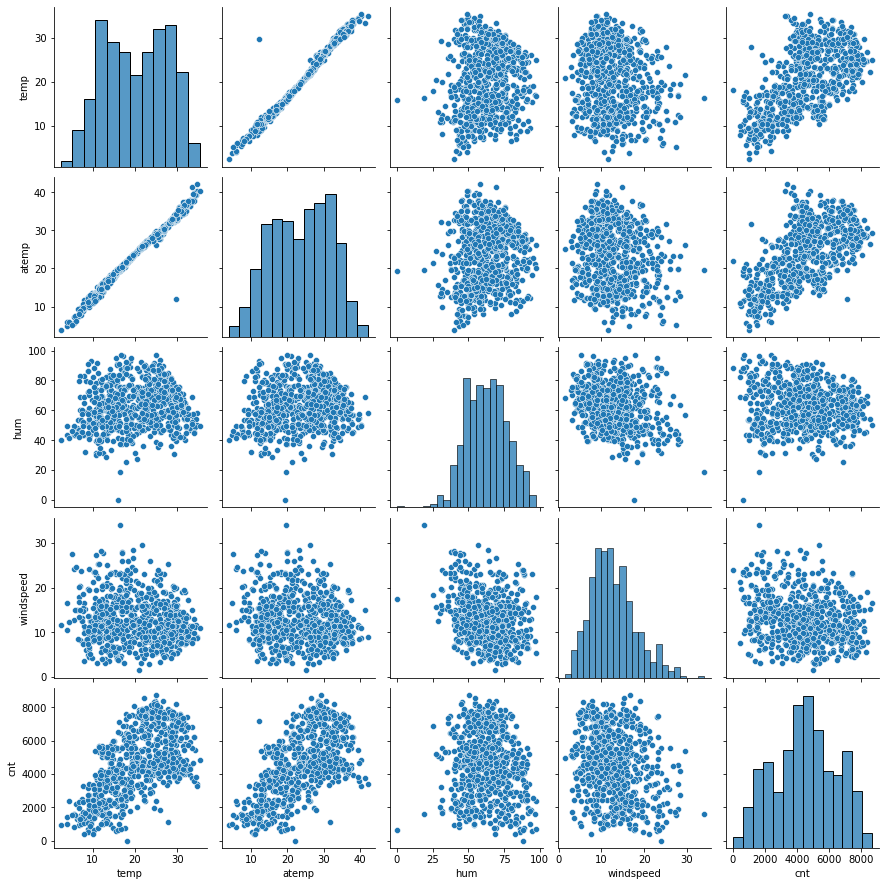

In [4002]:
## Visualising the numerical/continuous variables in a better way
sns.pairplot(bike[cont_cols])
plt.show()

## There is a linear relationship between temp and atemp means the independent variables temp and atemp is showing a positive correlation. 


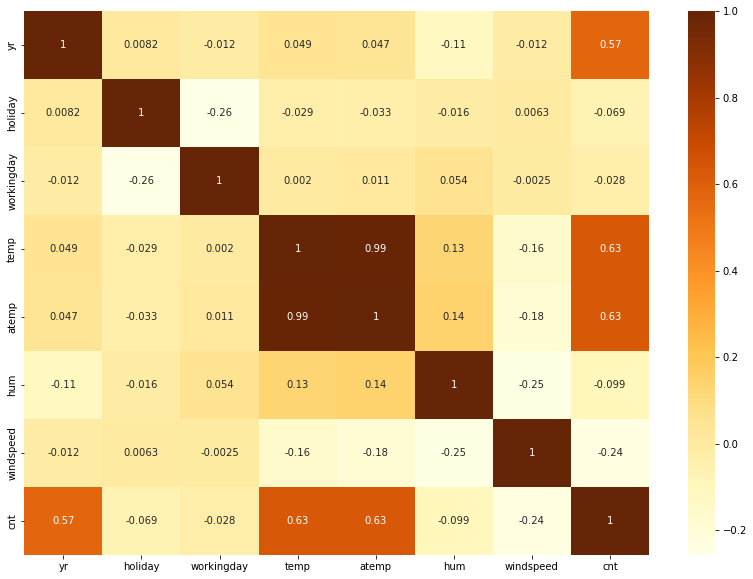

In [4003]:
##Let's check the correlation using correlation matrix
plt.figure(figsize=(14,10))
sns.heatmap(bike.corr(),annot= True,cmap="YlOrBr")
plt.show()

There is a correlation of 0.63 between cnt-temp and cnt-atemp.

There is a high correlation of 0.99 between temp and atemp.

In [4004]:
bike.head()

season  yr mnth  holiday weekday  workingday              weathersit  \
0  spring   0  Jan        0     Mon           1        Misty and Cloudy   
1  spring   0  Jan        0     Tue           1        Misty and Cloudy   
2  spring   0  Jan        0     Wed           1  clear to Partly Cloudy   
3  spring   0  Jan        0     Thu           1  clear to Partly Cloudy   
4  spring   0  Jan        0     Fri           1  clear to Partly Cloudy   

        temp     atemp      hum  windspeed   cnt  
0  14.110847  18.18125  80.5833  10.749882   985  
1  14.902598  17.68695  69.6087  16.652113   801  
2   8.050924   9.47025  43.7273  16.636703  1349  
3   8.200000  10.60610  59.0435  10.739832  1562  
4   9.305237  11.46350  43.6957  12.522300  1600

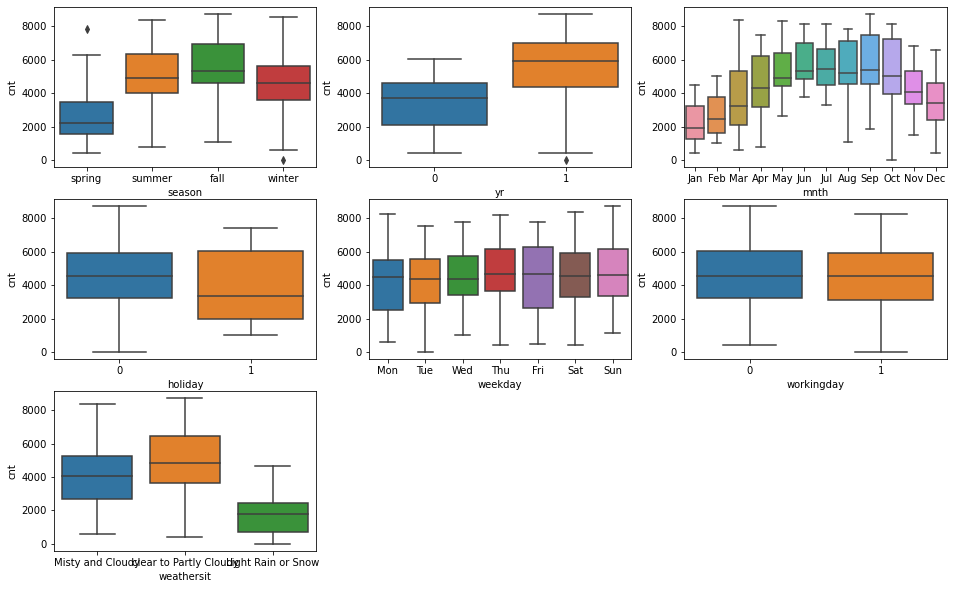

In [4005]:
## Visualising Categorical variables to understand data better

plt.figure(figsize=(16,10))
plt.subplot(3,3,1)           
sns.boxplot(x='season',y='cnt', data= bike)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt', data= bike)          
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt', data= bike)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt', data= bike)          
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt', data= bike)           
plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt', data= bike)           
plt.subplot(3,3,7) 
sns.boxplot(x='weathersit',y='cnt', data= bike)
plt.show()

1.Most of the bike bookings were happening in the summer and fall season with a median value of above 5000 bookings. So, season can be a good predictor for the dependent variable.

2.Year can also be a useful predictor as it is showing that in the year 2019, more bookings were done comparing to year 2018.

3.It is clear that in the June,July,August,September and October months,more than 5000 bike bookings were done.So, month can be a good predictor for the dependent variable.

4.Most of the bookings were done when there is no holiday. It might be because people generally travel for their work purpose.So, it can be a good predictor as well.

5.In the weekdays, the median is almost between 4000-5000. So, it will have no influence in the increasing bike bookings.

6.In the working days, bike bookings were happening with a median value of around 5000 bookings, which is consistent in the two years. It can be a good predictor.

7.Weathersit can also be a good predictor as it is showing some trend towards booking.During Misty and Cloudy weather, a median value of around 4000 bookings happened and during Clear to Partly Cloudy weather,there is a rise in bookings with a median value of around 5000 and then during Light Rain or Snow weather,there is a decrease in the number of bookings.

## Step-2: Preparing the data for modelling

In [4006]:
bike.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [4007]:
## converting the variables to object datatype

bike['season']=bike['season'].astype(object)
bike['mnth']=bike['mnth'].astype(object)
bike['weekday']=bike['weekday'].astype(object)
bike['weathersit']=bike['weathersit'].astype(object)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [4008]:
## Creating dummy variables for season,mnth,,weekday and weathersit

season_condition=pd.get_dummies(bike['season'])
month=pd.get_dummies(bike['mnth'])
weekday_condition=pd.get_dummies(bike['weekday'])
weathersit_condition=pd.get_dummies(bike['weathersit'])

In [4009]:
##dropping redundant dummy variable

season_condition=pd.get_dummies(bike['season'],drop_first=True)
month=pd.get_dummies(bike['mnth'],drop_first=True)
weekday_condition=pd.get_dummies(bike['weekday'],drop_first=True)
weathersit_condition=pd.get_dummies(bike['weathersit'],drop_first=True)

In [4010]:
bike=pd.concat([bike,season_condition],axis=1)
bike=pd.concat([bike,month],axis=1)
bike=pd.concat([bike,weekday_condition],axis=1)
bike=pd.concat([bike,weathersit_condition],axis=1)

In [4011]:
bike.head()

season  yr mnth  holiday weekday  workingday              weathersit  \
0  spring   0  Jan        0     Mon           1        Misty and Cloudy   
1  spring   0  Jan        0     Tue           1        Misty and Cloudy   
2  spring   0  Jan        0     Wed           1  clear to Partly Cloudy   
3  spring   0  Jan        0     Thu           1  clear to Partly Cloudy   
4  spring   0  Jan        0     Fri           1  clear to Partly Cloudy   

        temp     atemp      hum  ...  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  \
0  14.110847  18.18125  80.5833  ...    0    0    1    0    0    0    0    0   
1  14.902598  17.68695  69.6087  ...    0    0    0    0    0    0    1    0   
2   8.050924   9.47025  43.7273  ...    0    0    0    0    0    0    0    1   
3   8.200000  10.60610  59.0435  ...    0    0    0    0    0    1    0    0   
4   9.305237  11.46350  43.6957  ...    0    0    0    0    0    0    0    0   

   Misty and Cloudy  clear to Partly Cloudy  
0                 1                       0  
1                 1                       0  
2                 0                       1  
3                 0                       1  
4                 0                       1  

[5 rows x 34 columns]

In [4012]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   season                  730 non-null    object 
 1   yr                      730 non-null    int64  
 2   mnth                    730 non-null    object 
 3   holiday                 730 non-null    int64  
 4   weekday                 730 non-null    object 
 5   workingday              730 non-null    int64  
 6   weathersit              730 non-null    object 
 7   temp                    730 non-null    float64
 8   atemp                   730 non-null    float64
 9   hum                     730 non-null    float64
 10  windspeed               730 non-null    float64
 11  cnt                     730 non-null    int64  
 12  spring                  730 non-null    uint8  
 13  summer                  730 non-null    uint8  
 14  winter                  730 non-null    ui

In [4013]:
## Drop the original columns for which dummy variables created as they are not needed.

bike=bike.drop(['season'],axis=1)
bike=bike.drop(['mnth'],axis=1)
bike=bike.drop(['weekday'],axis=1)
bike=bike.drop(['weathersit'],axis=1)
bike.shape

(730, 30)

In [4014]:
bike.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           1  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           1  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   spring  summer  ...  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  \
0       1       0  ...    0    0    1    0    0    0    0    0   
1       1       0  ...    0    0    0    0    0    0    1    0   
2       1       0  ...    0    0    0    0    0    0    0    1   
3       1       0  ...    0    0    0    0    0    1    0    0   
4       1       0  ...    0    0    0    0    0    0    0    0   

   Misty and Cloudy  clear to Partly Cloudy  
0                 1                       0  
1                 1                       0  
2                 0                       1  
3                 0                       1  
4                 0                       1  

[5 rows x 30 columns]

### Splitting the dataset into test-train set

In [4015]:
df_train, df_test=train_test_split(bike, train_size=0.7,test_size=0.3, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


In [4016]:
# 1. Instantiate an object
scaler= MinMaxScaler()

# create a list of numeric variables
num_vars=['atemp','hum','temp','windspeed','cnt']

# 2. Fit on data
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794   
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           1  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   

          cnt  spring  summer  ...  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  \
653  0.864243       0       0  ...    1    0    0    0    0    0    0    1   
576  0.827658       0       0  ...    0    0    0    0    0    0    0    1   
426  0.465255       1       0  ...    0    0    0    0    1    0    0    0   
728  0.204096       1       0  ...    0    0    1    0    0    0    0    0   
482  0.482973       0       1  ...    0    0    0    0    1    0    0    0   

     Misty and Cloudy  clear to Partly Cloudy  
653                 0                       1  
576                 0                       1  
426                 1                       0  
728                 0                       1  
482                 1                       0  

[5 rows x 30 columns]

In [4017]:
df_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.711765    0.537262    0.512989    0.650369   
std      0.500429    0.157763    0.453386    0.225844    0.212385    0.145882   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.540519    0.526811    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt      spring      summer  ...         Oct  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.320768    0.513620    0.243137    0.245098  ...    0.086275   
std      0.169797    0.224593    0.429398    0.430568  ...    0.281045   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.199179    0.356420    0.000000    0.000000  ...    0.000000   
50%      0.296763    0.518638    0.000000    0.000000  ...    0.000000   
75%      0.414447    0.684710    0.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

              Sep         Mon         Sat         Sun         Thu         Tue  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.080392    0.154902    0.129412    0.137255    0.143137    0.152941   
std      0.272166    0.362166    0.335985    0.344454    0.350557    0.360284   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Wed  Misty and Cloudy  clear to Partly Cloudy  
count  510.000000        510.000000              510.000000  
mean     0.135294          0.343137                0.627451  
std      0.342373          0.475223                0.483958  
min      0.000000          0.000000                0.000000  
25%      0.000000          0.000000                0.000000  
50%      0.000000          0.000000                1.000000  
75%      0.000000          1.000000                1.000000  
max      1.000000          1.000000                1.000000  

[8 rows x 30 columns]

In [4018]:
df_test.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
184   0        1           0  29.793347  33.27085  63.7917   5.459106  6043   
535   1        0           1  32.082500  36.04875  59.2083   7.625404  6211   
299   0        0           0  19.270000  22.85230  81.2917  13.250121  2659   
221   0        0           1  31.433347  34.24915  42.4167  13.417286  4780   
152   0        0           0  29.315000  32.19710  30.5000  19.583229  4968   

     spring  summer  ...  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  \
184       0       0  ...    0    0    0    0    0    0    0    1   
535       0       1  ...    0    0    0    0    0    1    0    0   
299       0       0  ...    1    0    0    1    0    0    0    0   
221       0       0  ...    0    0    0    0    0    0    0    0   
152       0       1  ...    0    0    0    1    0    0    0    0   

     Misty and Cloudy  clear to Partly Cloudy  
184                 1                       0  
535                 0                       1  
299                 1                       0  
221                 0                       1  
152                 0                       1  

[5 rows x 30 columns]

In [4019]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yr                      219 non-null    int64  
 1   holiday                 219 non-null    int64  
 2   workingday              219 non-null    int64  
 3   temp                    219 non-null    float64
 4   atemp                   219 non-null    float64
 5   hum                     219 non-null    float64
 6   windspeed               219 non-null    float64
 7   cnt                     219 non-null    int64  
 8   spring                  219 non-null    uint8  
 9   summer                  219 non-null    uint8  
 10  winter                  219 non-null    uint8  
 11  Aug                     219 non-null    uint8  
 12  Dec                     219 non-null    uint8  
 13  Feb                     219 non-null    uint8  
 14  Jan                     219 non-null    u

## Step-3: Training the model

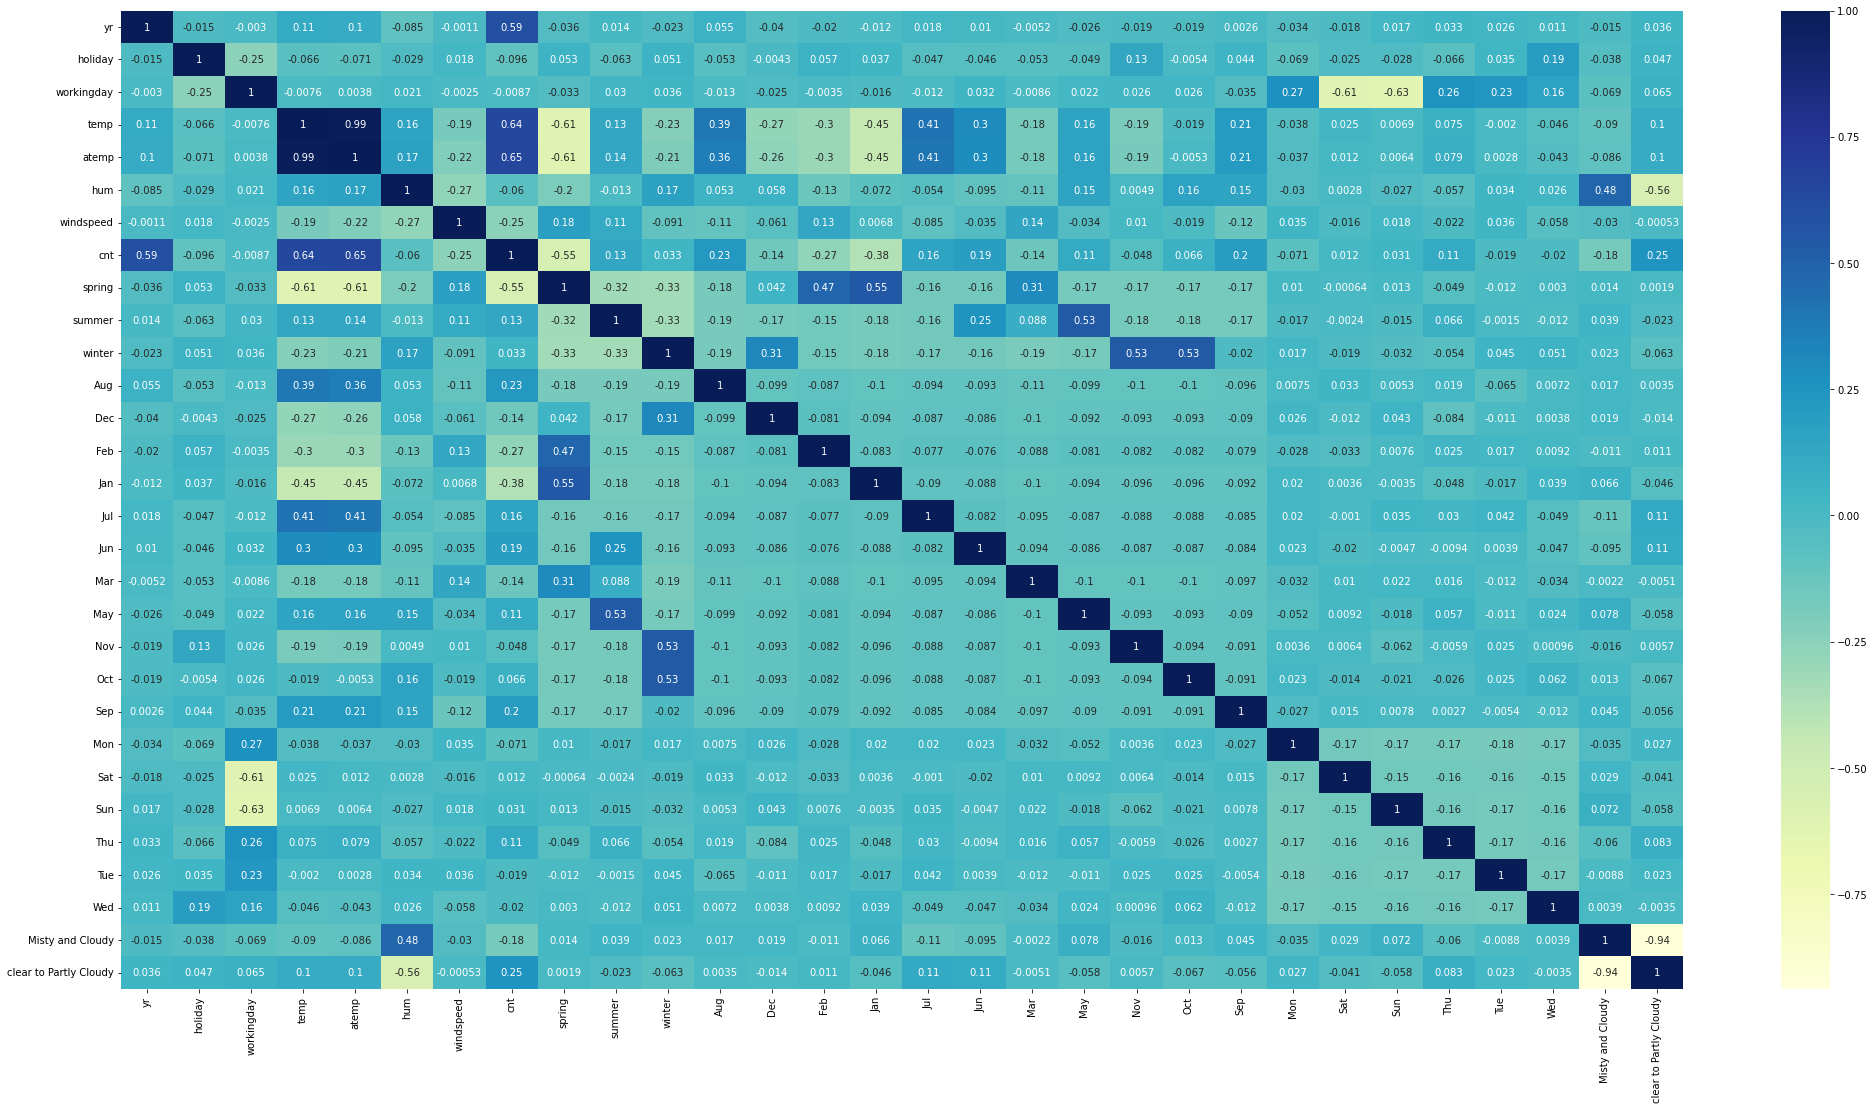

In [4020]:
# Heatmap: Let's check the correlation between variables
plt.figure(figsize=(35,18))
sns.heatmap(df_train.corr(),annot= True,cmap='YlGnBu')
plt.show()

In [4021]:
df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794   
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           1  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   

          cnt  spring  summer  ...  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  \
653  0.864243       0       0  ...    1    0    0    0    0    0    0    1   
576  0.827658       0       0  ...    0    0    0    0    0    0    0    1   
426  0.465255       1       0  ...    0    0    0    0    1    0    0    0   
728  0.204096       1       0  ...    0    0    1    0    0    0    0    0   
482  0.482973       0       1  ...    0    0    0    0    1    0    0    0   

     Misty and Cloudy  clear to Partly Cloudy  
653                 0                       1  
576                 0                       1  
426                 1                       0  
728                 0                       1  
482                 1                       0  

[5 rows x 30 columns]

In [4022]:
## creating X and y for model
X_train=df_train
y_train=df_train.pop('cnt')

In [4023]:
X_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  spring  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794       0   
576   1        0           1  0.815169  0.766351  0.725633   0.264686       0   
426   1        0           0  0.442393  0.438975  0.640189   0.255342       1   
728   1        0           1  0.245101  0.200348  0.498067   0.663106       1   
482   1        0           0  0.395666  0.391735  0.504508   0.188475       0   

     summer  winter  ...  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  \
653       0       1  ...    1    0    0    0    0    0    0    1   
576       0       0  ...    0    0    0    0    0    0    0    1   
426       0       0  ...    0    0    0    0    1    0    0    0   
728       0       0  ...    0    0    1    0    0    0    0    0   
482       1       0  ...    0    0    0    0    1    0    0    0   

     Misty and Cloudy  clear to Partly Cloudy  
653                 0                       1  
576                 0                       1  
426                 1                       0  
728                 0                       1  
482                 1                       0  

[5 rows x 29 columns]

In [4024]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [4025]:
X_train.shape

(510, 29)

In [4026]:
y_train.shape

(510,)

## Model building

In [4027]:
## Using RFE(Recursive Feature Elimination) for variable selection

In [4028]:
## Importing RFE and Linear Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [4029]:
## Running RFE with the output number of variables equal to 15 
# Creating an instance of LinearRegression
lm = LinearRegression()

# Fitting model with X train and y train
lm.fit(X_train,y_train)
# Creating RFE instance on fitted lm:
rfe = RFE(lm, 15)

## converting RFE to fitted RFE:
rfe = rfe.fit(X_train,y_train)

In [4030]:
# Brief visual observation of results:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 7),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 13),
 ('Tue', False, 8),
 ('Wed', False, 11),
 ('Misty and Cloudy', True, 1),
 ('clear to Partly Cloudy', True, 1)]

### Observations:
-- Above results show the RFE function suggestions to retain top 15 features.

-- Wherever the boolean return by rfe.support_is True, that feature is suggested by RFE and needs to be included in the  model.

In [4031]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Misty and Cloudy',
       'clear to Partly Cloudy'],
      dtype='object')

In [4032]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Mon',
       'Sat', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

### Building the model using statsmodel, for detailed statistics

In [4033]:
## Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col] 

### Model 1

In [4034]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif["feature"]=X_train_rfe.columns
vif["VIF Value"]= [round(variance_inflation_factor(X_train_rfe.values,i),2) for i in range(len(X_train_rfe.columns))]
vif= vif.sort_values(by="VIF Value", ascending=False)
vif

feature  VIF Value
3                      hum      26.36
2                     temp      25.12
14  clear to Partly Cloudy      15.69
13        Misty and Cloudy       9.25
5                   spring       5.75
4                windspeed       4.67
7                   winter       4.54
6                   summer       3.28
0                       yr       2.10
11                     Nov       1.89
9                      Jan       1.81
8                      Dec       1.61
10                     Jul       1.60
12                     Sep       1.43
1                  holiday       1.06

In [4035]:
import statsmodels.api as sm
X_train_rfe1= sm.add_constant(X_train_rfe)
lm1=sm.OLS(y_train,X_train_rfe1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          3.34e-189
Time:                        14:52:13   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### Obsevations:
1. VIF of 'hum'and 'temp' is very high and not in acceptable limits.
2. Both the feature are important and they cannot be dropped together.
3. Let's drop 'hum' to improvise the model. 

### Model 2

In [4036]:
## Dropping 'hum' column because of high VIF value
X_train_rfe2=X_train_rfe1.drop(labels='hum',axis=1)

In [4037]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif["feature"]=X_train_rfe2.columns
vif["VIF Value"]= [round(variance_inflation_factor(X_train_rfe2.values,i),2) for i in range(len(X_train_rfe2.columns))]
vif= vif.sort_values(by="VIF Value", ascending=False)
vif

feature  VIF Value
0                    const      93.68
14  clear to Partly Cloudy       8.68
13        Misty and Cloudy       8.63
5                   spring       5.21
3                     temp       4.10
7                   winter       3.68
6                   summer       2.73
11                     Nov       1.75
9                      Jan       1.67
8                      Dec       1.48
10                     Jul       1.48
12                     Sep       1.33
4                windspeed       1.12
2                  holiday       1.03
1                       yr       1.02

In [4038]:
## Rebuilding model
X_train_2= sm.add_constant(X_train_rfe2)
lm2=sm.OLS(y_train,X_train_2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          1.57e-186
Time:                        14:52:13   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

### Model 3

In [4039]:
## Dropping 'clear to Partly Cloudy' column having high p-value, which is insignificant
X_train_rfe3=X_train_rfe2.drop(labels='clear to Partly Cloudy',axis=1)

In [4040]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif["feature"]=X_train_rfe3.columns
vif["VIF Value"]= [round(variance_inflation_factor(X_train_rfe3.values,i),2) for i in range(len(X_train_rfe3.columns))]
vif= vif.sort_values(by="VIF Value", ascending=False)
vif

feature  VIF Value
0              const      63.03
5             spring       5.20
3               temp       4.08
7             winter       3.67
6             summer       2.72
11               Nov       1.75
9                Jan       1.66
10               Jul       1.48
8                Dec       1.47
12               Sep       1.32
4          windspeed       1.11
2            holiday       1.03
13  Misty and Cloudy       1.03
1                 yr       1.02

In [4041]:
## Rebuilding model
X_train_3= sm.add_constant(X_train_rfe3)
lm3=sm.OLS(y_train,X_train_3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     147.1
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          1.08e-160
Time:                        14:52:14   Log-Likelihood:                 441.37
No. Observations:                 510   AIC:                            -854.7
Df Residuals:                     496   BIC:                            -795.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2198      0.036  

### Model 4

In [4042]:
## Dropping 'Nov' column having high p-value, which is insignificant
X_train_rfe4=X_train_rfe3.drop(labels='Nov',axis=1)

In [4043]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif["feature"]=X_train_rfe4.columns
vif["VIF Value"]= [round(variance_inflation_factor(X_train_rfe4.values,i),2) for i in range(len(X_train_rfe4.columns))]
vif= vif.sort_values(by="VIF Value", ascending=False)
vif

feature  VIF Value
0              const      59.15
5             spring       5.03
3               temp       3.82
7             winter       3.44
6             summer       2.65
9                Jan       1.64
10               Jul       1.48
11               Sep       1.29
8                Dec       1.25
4          windspeed       1.11
12  Misty and Cloudy       1.03
1                 yr       1.02
2            holiday       1.02

In [4044]:
## Rebuilding model
X_train_4= sm.add_constant(X_train_rfe4)
lm4=sm.OLS(y_train,X_train_4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     159.1
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          1.63e-161
Time:                        14:52:14   Log-Likelihood:                 440.69
No. Observations:                 510   AIC:                            -855.4
Df Residuals:                     497   BIC:                            -800.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2094      0.035  

### Model 5

In [4045]:
## Dropping 'Dec' column having high p-value, which is insignificant
X_train_rfe5=X_train_rfe4.drop(labels='Dec',axis=1)

In [4046]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif["feature"]=X_train_rfe5.columns
vif["VIF Value"]= [round(variance_inflation_factor(X_train_rfe5.values,i),2) for i in range(len(X_train_rfe5.columns))]
vif= vif.sort_values(by="VIF Value", ascending=False)
vif

feature  VIF Value
0              const      55.85
5             spring       5.02
3               temp       3.62
7             winter       3.43
6             summer       2.61
8                Jan       1.56
9                Jul       1.48
10               Sep       1.28
4          windspeed       1.10
11  Misty and Cloudy       1.03
1                 yr       1.02
2            holiday       1.01

In [4047]:
## Rebuilding model
X_train_5= sm.add_constant(X_train_rfe5)
lm5=sm.OLS(y_train,X_train_5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     173.5
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          2.01e-162
Time:                        14:52:14   Log-Likelihood:                 440.16
No. Observations:                 510   AIC:                            -856.3
Df Residuals:                     498   BIC:                            -805.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2010      0.034  

### Model 6

In [4048]:
## Dropping 'Jan' column having high p-value, which is insignificant
X_train_rfe6=X_train_rfe5.drop(labels='Jan',axis=1)

In [4049]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif["feature"]=X_train_rfe6.columns
vif["VIF Value"]= [round(variance_inflation_factor(X_train_rfe6.values,i),2) for i in range(len(X_train_rfe6.columns))]
vif= vif.sort_values(by="VIF Value", ascending=False)
vif

feature  VIF Value
0              const      52.50
5             spring       4.95
3               temp       3.38
7             winter       3.34
6             summer       2.59
8                Jul       1.48
9                Sep       1.28
4          windspeed       1.08
10  Misty and Cloudy       1.03
1                 yr       1.02
2            holiday       1.01

In [4050]:
## Rebuilding model
X_train_6= sm.add_constant(X_train_rfe6)
lm6=sm.OLS(y_train,X_train_6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     189.9
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          5.44e-163
Time:                        14:52:14   Log-Likelihood:                 438.78
No. Observations:                 510   AIC:                            -855.6
Df Residuals:                     499   BIC:                            -809.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1872      0.033  

### Model 7

In [4051]:
## Dropping 'spring' column having high p-value, which is insignificant
X_train_rfe7=X_train_rfe6.drop(labels='spring',axis=1)

In [4052]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif["feature"]=X_train_rfe7.columns
vif["VIF Value"]= [round(variance_inflation_factor(X_train_rfe7.values,i),2) for i in range(len(X_train_rfe7.columns))]
vif= vif.sort_values(by="VIF Value", ascending=False)
vif

feature  VIF Value
0             const      16.70
3              temp       1.50
7               Jul       1.42
5            summer       1.33
6            winter       1.22
8               Sep       1.18
4         windspeed       1.08
9  Misty and Cloudy       1.03
1                yr       1.01
2           holiday       1.01

In [4053]:
## Rebuilding model
X_train_7= sm.add_constant(X_train_rfe7)
lm7=sm.OLS(y_train,X_train_7).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     208.1
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          8.29e-163
Time:                        14:52:14   Log-Likelihood:                 435.58
No. Observations:                 510   AIC:                            -851.2
Df Residuals:                     500   BIC:                            -808.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1183      0.019  

### Model 8

In [4054]:
## Dropping 'jul' column having high p-value, which is insignificant
X_train_rfe8=X_train_rfe7.drop(labels='Jul',axis=1)

In [4055]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif["feature"]=X_train_rfe8.columns
vif["VIF Value"]= [round(variance_inflation_factor(X_train_rfe8.values,i),2) for i in range(len(X_train_rfe8.columns))]
vif= vif.sort_values(by="VIF Value", ascending=False)
vif

feature  VIF Value
0             const      16.50
3              temp       1.20
5            summer       1.19
6            winter       1.19
7               Sep       1.10
4         windspeed       1.08
8  Misty and Cloudy       1.02
1                yr       1.01
2           holiday       1.01

In [4056]:
## Rebuilding model
X_train_8= sm.add_constant(X_train_rfe8)
lm8=sm.OLS(y_train,X_train_8).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     231.8
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          5.28e-163
Time:                        14:52:14   Log-Likelihood:                 433.22
No. Observations:                 510   AIC:                            -848.4
Df Residuals:                     501   BIC:                            -810.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1228      0.019  

### Model 9

In [4057]:
## Dropping 'holiday' column:
X_train_rfe9=X_train_rfe8.drop(labels='holiday',axis=1)

In [4058]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif["feature"]=X_train_rfe9.columns
vif["VIF Value"]= [round(variance_inflation_factor(X_train_rfe9.values,i),2) for i in range(len(X_train_rfe9.columns))]
vif= vif.sort_values(by="VIF Value", ascending=False)
vif

feature  VIF Value
0             const      16.39
2              temp       1.19
4            summer       1.19
5            winter       1.19
6               Sep       1.10
3         windspeed       1.08
7  Misty and Cloudy       1.02
1                yr       1.01

In [4059]:
## Rebuilding model
X_train_9= sm.add_constant(X_train_rfe9)
lm9=sm.OLS(y_train,X_train_9).fit()
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     259.9
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          1.97e-162
Time:                        14:52:15   Log-Likelihood:                 429.00
No. Observations:                 510   AIC:                            -842.0
Df Residuals:                     502   BIC:                            -808.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1185      0.019  

### Observation:
1. The model 9 looks descent with significant p-values and very low multicollinearity between the predictor variables.
2. The R-squared and Adjusted R-square values are 0.784 and 0.781 respectively which looks pretty good.
3. The model also have a high F-static value which states the good fit of model.


## Residual Analysis of the train data

In [4060]:
y_train_predict=lm9.predict(X_train_9)

Text(0.5, 0, 'Errors')

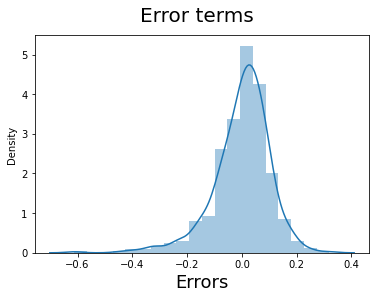

In [4061]:
res= y_train-y_train_predict

## Plot the histograms of the error terms
fig=plt.figure()
sns.distplot((res),bins=20)
##Plot heading
fig.suptitle('Error terms',fontsize=20)
## X-label
plt.xlabel('Errors',fontsize=18)

Observation

From the plot, it is clear that the residuals are normally distributed, and hence our assumption for linear regression is valid.


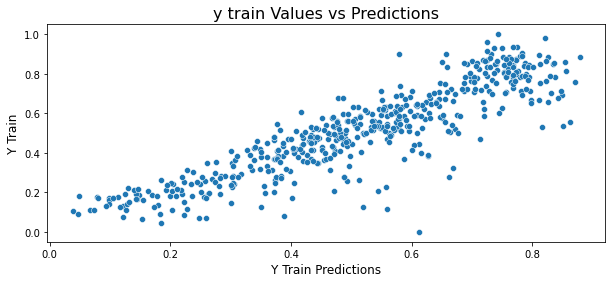

In [4062]:
## Plot residuals against predicted values
plt.figure(figsize=(10,4))
sns.scatterplot(y=y_train,x=y_train_predict,palette='Purples')
##Plot heading
plt.title('y train Values vs Predictions',fontsize=16)
## X-label
plt.xlabel('y train predictions'.title(),fontsize=12)
## Y-label
plt.ylabel('y train'.title(),fontsize=12)
plt.show()

# Making Predictions Using the Final Model 

In [4063]:
X_train_9.columns

Index(['const', 'yr', 'temp', 'windspeed', 'summer', 'winter', 'Sep',
       'Misty and Cloudy'],
      dtype='object')

In [4064]:
print(X_train_9.shape)
print(res.shape)

(510, 8)
(510,)


In [4065]:
## Scaling the test data
# create a list of numeric variables
num_vars=['atemp','hum','temp','windspeed','cnt']

# 2. Fit on data
df_test[num_vars]=scaler.fit_transform(df_test[num_vars])
df_test.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
184   0        1           0  0.837241  0.778767  0.534223   0.149393   
535   1        0           1  0.911423  0.855132  0.470417   0.231142   
299   0        0           0  0.496221  0.492359  0.777843   0.443398   
221   0        0           1  0.890387  0.805661  0.236659   0.449707   
152   0        0           0  0.821739  0.749249  0.070765   0.682387   

          cnt  spring  summer  ...  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  \
184  0.704300       0       0  ...    0    0    0    0    0    0    0    1   
535  0.725421       0       1  ...    0    0    0    0    0    1    0    0   
299  0.278853       0       0  ...    1    0    0    1    0    0    0    0   
221  0.545512       0       0  ...    0    0    0    0    0    0    0    0   
152  0.569148       0       1  ...    0    0    0    1    0    0    0    0   

     Misty and Cloudy  clear to Partly Cloudy  
184                 1                       0  
535                 0                       1  
299                 1                       0  
221                 0                       1  
152                 0                       1  

[5 rows x 30 columns]

In [4066]:
df_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.479452    0.036530    0.639269    0.546312    0.530942    0.508750   
std      0.500722    0.188034    0.481313    0.249189    0.228159    0.201253   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.328479    0.333829    0.358469   
50%      0.000000    0.000000    1.000000    0.546045    0.547913    0.494200   
75%      1.000000    0.000000    1.000000    0.759735    0.720622    0.651165   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt      spring      summer  ...         Oct  \
count  219.000000  219.000000  219.000000  219.000000  ...  219.000000   
mean     0.418870    0.516216    0.255708    0.264840  ...    0.082192   
std      0.188111    0.238702    0.437258    0.442259  ...    0.275286   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.283817    0.359882    0.000000    0.000000  ...    0.000000   
50%      0.402533    0.520241    0.000000    0.000000  ...    0.000000   
75%      0.524362    0.682487    1.000000    1.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

              Sep         Mon         Sat         Sun         Thu         Tue  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.086758    0.118721    0.173516    0.155251    0.141553    0.123288   
std      0.282125    0.324202    0.379560    0.362974    0.349389    0.329520   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Wed  Misty and Cloudy  clear to Partly Cloudy  
count  219.000000        219.000000              219.000000  
mean     0.155251          0.319635                0.652968  
std      0.362974          0.467403                0.477117  
min      0.000000          0.000000                0.000000  
25%      0.000000          0.000000                0.000000  
50%      0.000000          0.000000                1.000000  
75%      0.000000          1.000000                1.000000  
max      1.000000          1.000000                1.000000  

[8 rows x 30 columns]

In [4067]:
## creating X and y for model
X_test=df_test
y_test=df_test.pop('cnt')

In [4068]:
X_test.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  spring  \
184   0        1           0  0.837241  0.778767  0.534223   0.149393       0   
535   1        0           1  0.911423  0.855132  0.470417   0.231142       0   
299   0        0           0  0.496221  0.492359  0.777843   0.443398       0   
221   0        0           1  0.890387  0.805661  0.236659   0.449707       0   
152   0        0           0  0.821739  0.749249  0.070765   0.682387       0   

     summer  winter  ...  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  \
184       0       0  ...    0    0    0    0    0    0    0    1   
535       1       0  ...    0    0    0    0    0    1    0    0   
299       0       1  ...    1    0    0    1    0    0    0    0   
221       0       0  ...    0    0    0    0    0    0    0    0   
152       1       0  ...    0    0    0    1    0    0    0    0   

     Misty and Cloudy  clear to Partly Cloudy  
184                 1                       0  
535                 0                       1  
299                 1                       0  
221                 0                       1  
152                 0                       1  

[5 rows x 29 columns]

In [4069]:
X_test.shape

(219, 29)

In [4070]:
y_test.head()

184    0.704300
535    0.725421
299    0.278853
221    0.545512
152    0.569148
Name: cnt, dtype: float64

In [4071]:
y_test.shape

(219,)

### Making Actual predictions:

In [4072]:
X_train_new= X_train_9.drop(['const'],axis=1)

In [4073]:
## Selecting the variables that are part of the model
## Creating X_test_new dataframe by dropping variables from X_test
X_test_new= X_test[X_train_new.columns]

## adding a constant variable
X_test_new=sm.add_constant(X_test_new)



In [4074]:
## Making Predictions using Final Model
y_test_predict=lm9.predict(X_test_new)

Text(0, 0.5, 'predicted y_test')

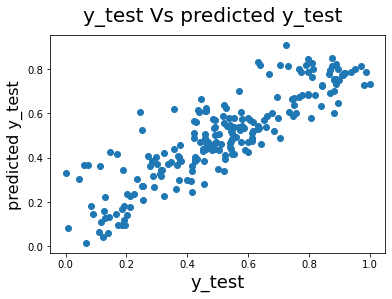

In [4075]:
## Checking predicted Vs Test data to understand the spread
## Plot the hist of the error terms
fig=plt.figure()
plt.scatter(y_test,y_test_predict)
##Plot heading
fig.suptitle('y_test Vs predicted y_test',fontsize=20)
## X-label
plt.xlabel('y_test',fontsize=18)
## y-label
plt.ylabel('predicted y_test',fontsize=16)

### R-squared Value test



In [4076]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_test_predict)
r2

0.7531031447691032

In [4077]:
print('R2 score of test data predictions:', round(r2_score(y_pred=y_test_predict, y_true=y_test),5))
print('R2 score of train data predictions:', round(r2_score(y_pred=y_train_predict, y_true=y_train),5))
print('Absolute difference between R2 scores of test and train dataset predictions:',abs(round(r2_score(y_pred=y_test_predict, y_true=y_test) - r2_score(y_pred=y_train_predict, y_true=y_train),5)))

R2 score of test data predictions: 0.7531
R2 score of train data predictions: 0.78375
Absolute difference between R2 scores of test and train dataset predictions: 0.03065


Since variation between train data prediction and test data prediction r2_score is less than 5%, model is fit for generalization. .


## Equation for prediction:



In [4078]:
## Initiating const variable for constant
const=0.1185            # This information is taken from X_train_9 OLS model above


## Parameters series:
Parameter_series= pd.Series(lm9.params)
print(Parameter_series)

const               0.118476
yr                  0.238722
temp                0.553775
windspeed          -0.183101
summer              0.088082
winter              0.115709
Sep                 0.088023
Misty and Cloudy   -0.065157
dtype: float64


## Demand= 0.118 + (yr x 0.239) + (temp x 0.554) + (windspeed x -0.183) + (summer x 0.088) + (winter x 0.116) + (Sep x 0.088) + (Misty and Cloudy x -0.065)

#### Observations:
1. Coefficients of Year,Temperature, Summer, Winter and September are positive.
2. Coefficients of Windspeed and Misty and Cloudy are negative.
3. Constant is 0.118. That is, if all variables are kept as 0, the demand will be 0.118.

### Model Explanation:
1. If all the variables are kept as 0, the demand will be 0.118.
2. If other features remain unchanged,with every change of year, demand is expected to increase by 0.239 units.
3. If other features remain unchanged,demand is expected to increase by 0.088 units in the months corresponding to Summer season.
4. If other features remain unchanged,demand is expected to increase by 0.116 units in the months corresponding to Winter season.
5. If other features remain unchanged,demand is expected to increase by 0.088 units in the month of September.
6. If other features remain unchanged,demand is expected to decrease by 0.065 units during Misty and Cloudy Weather.

## Final Business Recommendations:
#### Top 3 most important factors:
1. Most important factor affecting demand is temperature. With a coefficient of 0.553775, for every 1 degree change in temperature, demand increases by a factor of 0.553775.
   
   Based on this, company will have to consider:
   (a) To fullfill the demands during hotter months, necessary capacity building should be done(hottest month found to be fall season).
   
2. Year is also an important factor with a coefficient value of 0.238722. Based on the historical data available, the company can expect to see annual growth over last year at around 24%.

3. Winter is an important factor with a coefficient value of 0.115709.This implies that demand is increasing by a factor of 0.115709 every winter.So, the company needs to work on fulfilling the demand by increasing the capacity planning alongwith should also plan for promotional campaigns during winter season.
